<a href="https://colab.research.google.com/github/rkarpin/ML_LAB/blob/main/ML_homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal



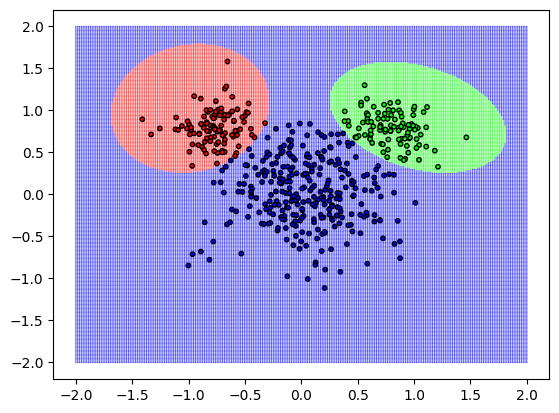

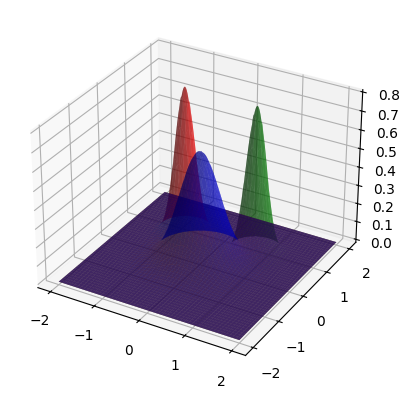

In [177]:
np.random.seed(1)


mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)


mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)


mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)


data_X = np.vstack([data1, data2, data3])
N, d = data_X.shape



gm = GaussianMixture(n_components=3, random_state=0).fit(data_X)
X_clusters = gm.predict(data_X)


x = np.linspace(-2,2,250)
X, Y = np.meshgrid(x, x)
points = np.append(X.reshape(-1,1),Y.reshape(-1,1),axis=1)
regions = gm.predict(points)

plt.scatter(X, Y, marker ='o', c = regions, cmap='brg', alpha =0.7, s=1,edgecolors='none')
plt.scatter(data_X.T[0],data_X.T[1], c = X_clusters, cmap='brg',s=10,edgecolors='black')

x, y = np.mgrid[-2.0:2.0:300j, -2.0:2.0:300j]


xy = np.column_stack([x.flat, y.flat])



z1 = 0.6* multivariate_normal.pdf(xy, mean=[0.0, 0.0], cov=[[0.16, 0.0],
                 [0.0,  0.16]])
z2 = 0.2*multivariate_normal.pdf(xy, mean=[0.8, 0.8], cov=[[0.04, 0.0],
                 [0.0,  0.04]])
z3 = 0.2* multivariate_normal.pdf(xy, mean=[-0.8, 0.8], cov=[[0.04, 0.0],
                 [0.0,  0.04]])



z1 = z1.reshape(x.shape)
z2 = z2.reshape(x.shape)
z3 = z3.reshape(x.shape)




fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(x,y,z1,alpha=0.5, color='blue')
ax.plot_surface(x,y,z2,alpha=0.5, color ='green')
ax.plot_surface(x,y,z3,alpha=0.5, color='red')


plt.show()

Może wydawać się nieintuicyjne, że większość punktów płasczyzny jest pomalowana na niebiesko (nawet te blisko czerwonego lub zielonego klastra, a położone daleko od danych zaznaczonych na niebiesko). Aby to wyjaśnić wystarczy narysować trzy krzywe gaussowskie - widzimy, że niebieka ma "grubszy ogon" - stąd punkty położone daleko od danych są pomalowane na niebiesko.

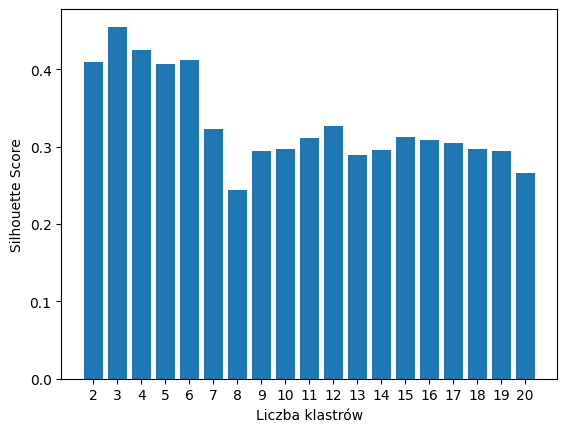

In [158]:
plt.xlabel("Liczba klastrów")
plt.ylabel("Silhouette Score")

for i in range(2,21):

  gm = GaussianMixture(n_components=i, random_state=0).fit(data_X)
  X_clusters = gm.predict(data_X)
  plt.xticks(range(2,21))
  plt.bar(i,silhouette_score(data_X, X_clusters), color='tab:blue')





Widzimy, że Silhouette Score jest największy dla 3 klastrów, więc jest to optymalna liczba klastrów dla tego zbioru danych.